In [76]:
#### Notebook 2019-07-30 23:37CT by Joshua Yao-Yu Lin

import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import lenstronomy.Util.image_util as image_util
import os, sys
import pandas as pd
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
from tensorboardX import SummaryWriter

In [77]:
root_folder = "/media/joshua/HDD_fun2/time_delay_challenge/First_sims/"
train_folder = "train/"
test_folder = "test/"
train_data = pd.read_csv(root_folder + train_folder + "lens_info.csv")
test_data = pd.read_csv(root_folder + test_folder + "lens_info.csv")

EHT_test_path = root_folder + test_folder
files = os.listdir(EHT_test_path)
loaded_model_path = './saved_model/power_law_pred_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor

loaded mdl！
/home/joshua/Documents/git_work_zone/time_delay_challenge


In [78]:
glo_batch_size = 1
test_num_batch = 1



class DeepLenstronomyDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train  # training set or test set
        self.train_folder = 'train'#'data_train'
        self.test_folder = 'test'#'data_test'
        #self.df = pd.read_csv('../input/clean-full-train/clean_full_data.csv') #+ '/clean_full_data.csv')


        if self.train:
            self.path = os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')


            #self.length = TRAINING_SAMPLES
        else:
            self.path = os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')
            #self.length = TESTING_SAMPLES

    def __getitem__(self, index):
        #   gamma  center_x  center_y        e1        e2  source_x  source_y  gamma_ext  psi_ext
        #print(self.df['name'].iloc[[index]])
        name = self.df['name'].iloc[[index]]
        theta_E = self.df['theta_E'].iloc[[index]]
        gamma = self.df['gamma_ext'].iloc[[index]]
        center_x = self.df['center_x'].iloc[[index]]
        center_y = self.df['center_y'].iloc[[index]]
        e1 = self.df['e1'].iloc[[index]]
        e2 = self.df['e2'].iloc[[index]]
        source_x = self.df['source_x'].iloc[[index]]
        source_y = self.df['source_y'].iloc[[index]]
        gamma_ext = self.df['gamma_ext'].iloc[[index]]
        psi_ext = self.df['psi_ext'].iloc[[index]]
        img_path = self.path + "/" + str(name.values[0]) + ".npy"
        img = np.load(img_path)
        img = scipy.ndimage.zoom(img, 224/100, order=1)
        image = np.zeros((3, 224, 224))
        for i in range(3):
            image[i, :, :] += img
        return image, theta_E.values, gamma.values, center_x.values, center_y.values, e1.values, e2.values, source_x.values, source_y.values, gamma_ext.values, psi_ext.values


    def __len__(self):
        return self.df.shape[0]
    
train_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=True, transform=data_transform, target_transform=target_transform),
                    batch_size = glo_batch_size, shuffle = True
                    )

test_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

lens parameters: theta_E, e1, e2(ground trouth) 1.8492271016049169 -0.041169607122469684 -0.05932893435571392
parameters: theta_E, e1, e2(prediction): 1.8395665 -0.040633515 -0.05837112
source positions(ground trouth) 0.0058609549998865215 -0.014755346073679431
source positions(prediction): 0.00203755 -0.007926036


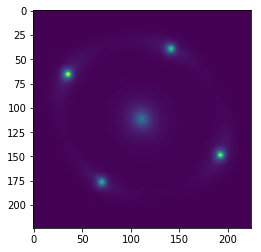

lens parameters: theta_E, e1, e2(ground trouth) 1.849290132560268 0.00605446120879909 -0.05649078196312216
parameters: theta_E, e1, e2(prediction): 1.8400705 0.0029042754 -0.05351662
source positions(ground trouth) 0.007616017736852902 0.04991220966125588
source positions(prediction): -0.0012213264 0.055978216


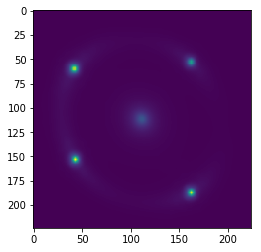

lens parameters: theta_E, e1, e2(ground trouth) 1.8086898000846627 -0.06181217403401501 -0.0034860954460375518
parameters: theta_E, e1, e2(prediction): 1.8039314 -0.0599126 -0.00713294
source positions(ground trouth) 0.0062091071731853464 0.027750345064542645
source positions(prediction): 0.004923164 0.036750704


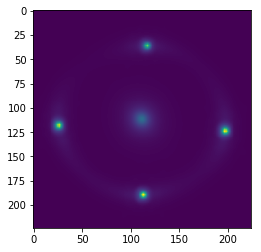

lens parameters: theta_E, e1, e2(ground trouth) 1.7111353109052136 0.07135037186533214 0.025099373118386573
parameters: theta_E, e1, e2(prediction): 1.7084887 0.0639729 0.019572623
source positions(ground trouth) 0.025089236576286963 -0.013631527932835195
source positions(prediction): 0.016452044 -0.001803048


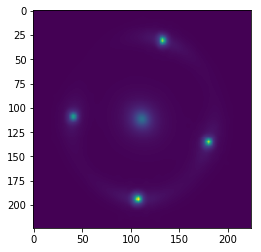

lens parameters: theta_E, e1, e2(ground trouth) 1.6918616004109954 0.09198055667131427 -0.03298360051278262
parameters: theta_E, e1, e2(prediction): 1.6828871 0.08459381 -0.03691303
source positions(ground trouth) 0.011902709494677852 -0.010157516257842558
source positions(prediction): 0.0049819956 0.00014794618


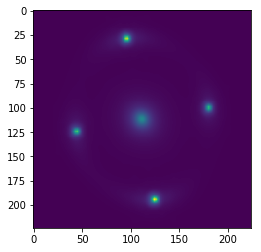

lens parameters: theta_E, e1, e2(ground trouth) 1.9797827345805852 0.021883156381760617 0.06720301009149272
parameters: theta_E, e1, e2(prediction): 1.9693352 0.017527215 0.060703672
source positions(ground trouth) -0.0008251655709643341 -0.01504494373783218
source positions(prediction): -0.008323201 -0.008088838


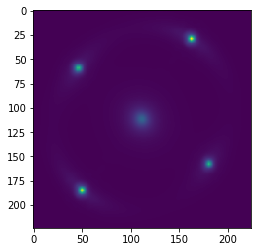

lens parameters: theta_E, e1, e2(ground trouth) 1.9185276117668009 -0.0018206524738179075 -0.08047622864217321
parameters: theta_E, e1, e2(prediction): 1.8984848 -0.0062607285 -0.078234695
source positions(ground trouth) -0.0366511040990134 -0.036361864083393404
source positions(prediction): -0.03065023 -0.016787477


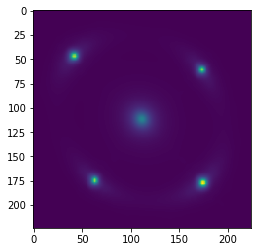

lens parameters: theta_E, e1, e2(ground trouth) 1.7518608286593047 0.032470035044366206 0.02492274544374129
parameters: theta_E, e1, e2(prediction): 1.7532097 0.028703453 0.019855924
source positions(ground trouth) 0.015335712371282216 0.029759609622010894
source positions(prediction): 0.0067809885 0.03681115


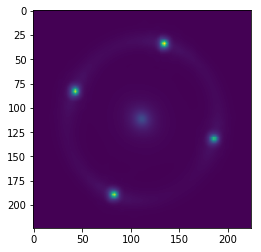

lens parameters: theta_E, e1, e2(ground trouth) 1.788199005305863 -0.06023334012825901 -0.049832959491619463
parameters: theta_E, e1, e2(prediction): 1.7794387 -0.05970253 -0.048431985
source positions(ground trouth) -0.009686096868362346 0.04223835988695267
source positions(prediction): -0.014683138 0.047288366


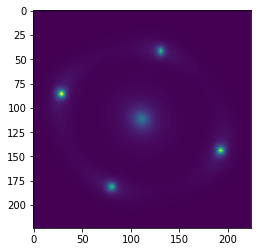

lens parameters: theta_E, e1, e2(ground trouth) 1.867250750409815 -0.06628312969281414 0.07862420316468997
parameters: theta_E, e1, e2(prediction): 1.855293 -0.0641571 0.068607874
source positions(ground trouth) 0.004694018696340077 -0.012221403407304376
source positions(prediction): -0.001142246 0.00080256164


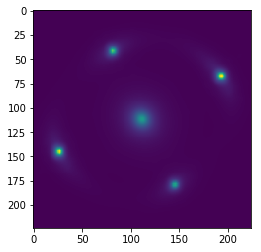

lens parameters: theta_E, e1, e2(ground trouth) 1.6962553519684307 -0.04209636192099773 -0.03222988050885756
parameters: theta_E, e1, e2(prediction): 1.694171 -0.041116253 -0.033468686
source positions(ground trouth) -0.042433585388370436 -0.04782230659952855
source positions(prediction): -0.040008318 -0.030631065


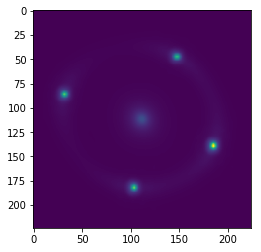

lens parameters: theta_E, e1, e2(ground trouth) 1.9180567637553576 -0.04061247407262787 -0.05011542099648792
parameters: theta_E, e1, e2(prediction): 1.9094653 -0.040896162 -0.048991375
source positions(ground trouth) 0.011016759328279445 -0.002554225873797153
source positions(prediction): 0.008174234 0.0022540167


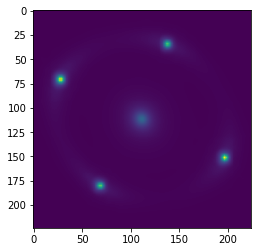

lens parameters: theta_E, e1, e2(ground trouth) 1.509261091931079 -0.026942510411001756 0.0026762257370090306
parameters: theta_E, e1, e2(prediction): 1.5126835 -0.029222155 0.002816029
source positions(ground trouth) -0.04346525107454361 0.034334664387361886
source positions(prediction): -0.03659067 0.042027537


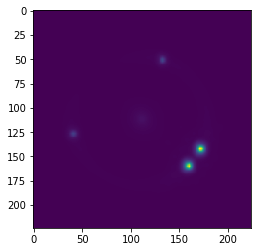

lens parameters: theta_E, e1, e2(ground trouth) 1.7797109725326767 -0.07321863973777235 -0.0477148344221976
parameters: theta_E, e1, e2(prediction): 1.7710313 -0.071972296 -0.046765618
source positions(ground trouth) -0.003105630052172438 0.01991485970747564
source positions(prediction): -0.008278715 0.02621504


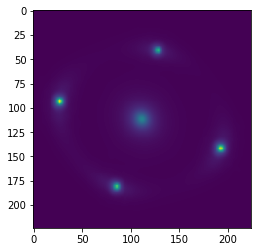

lens parameters: theta_E, e1, e2(ground trouth) 1.5570545317461864 0.00048508760517242957 0.04817974665078078
parameters: theta_E, e1, e2(prediction): 1.5622183 -0.0018347781 0.04449392
source positions(ground trouth) 0.036893095644732664 -0.015215489620626263
source positions(prediction): 0.026036577 -0.009496547


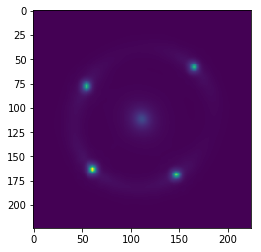

lens parameters: theta_E, e1, e2(ground trouth) 1.675630487763843 0.004887209814452231 -0.08676025461904194
parameters: theta_E, e1, e2(prediction): 1.6632152 0.0020993296 -0.08337163
source positions(ground trouth) 0.044604609564173815 0.0375042477834097
source positions(prediction): 0.039218392 0.041988853


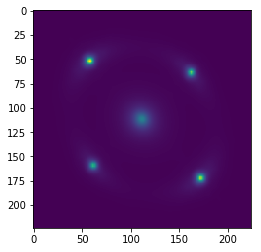

lens parameters: theta_E, e1, e2(ground trouth) 1.5568261102715644 -0.05273799748243156 -0.06541642866083401
parameters: theta_E, e1, e2(prediction): 1.5554951 -0.051954307 -0.0626049
source positions(ground trouth) -0.0454768638688122 -0.048051743037538085
source positions(prediction): -0.046558682 -0.034606338


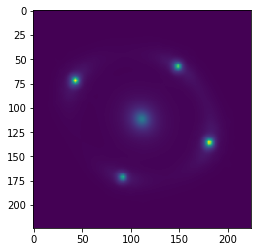

lens parameters: theta_E, e1, e2(ground trouth) 1.8055784456757396 0.09473023575014616 0.04499818554730972
parameters: theta_E, e1, e2(prediction): 1.80453 0.083584145 0.038633473
source positions(ground trouth) -0.023132992646928297 0.006554065997336746
source positions(prediction): -0.028467644 0.015854184


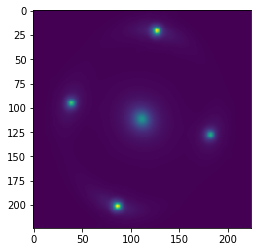

lens parameters: theta_E, e1, e2(ground trouth) 1.955312285771997 0.016941399984878515 -0.09450789175060458
parameters: theta_E, e1, e2(prediction): 1.9242727 0.012189308 -0.0917316
source positions(ground trouth) -0.001081225987860604 -0.022233412813912903
source positions(prediction): 0.010027322 -0.00040335953


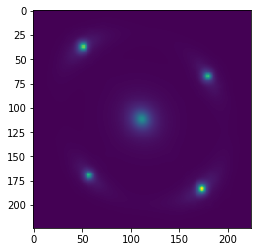

lens parameters: theta_E, e1, e2(ground trouth) 1.7061636231320059 0.036022380108290265 0.07987227512444216
parameters: theta_E, e1, e2(prediction): 1.7024106 0.029600704 0.072810896
source positions(ground trouth) 0.014879525903122831 0.010490036256697937
source positions(prediction): 0.00886096 0.019159023


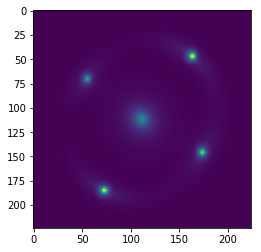

lens parameters: theta_E, e1, e2(ground trouth) 1.795299278417121 0.09623144381480947 -0.0009950518333319946
parameters: theta_E, e1, e2(prediction): 1.7837933 0.08628874 -0.0071721897
source positions(ground trouth) 0.04068705200042054 -0.045040953466831325
source positions(prediction): 0.032477267 -0.030637398


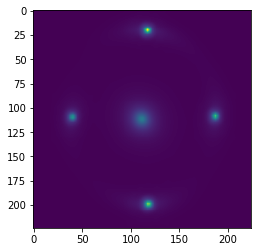

lens parameters: theta_E, e1, e2(ground trouth) 1.938414889657132 0.0182988291775468 -0.02835529424781438
parameters: theta_E, e1, e2(prediction): 1.9291892 0.014761923 -0.029809587
source positions(ground trouth) -0.02530760062229464 0.04034562145278134
source positions(prediction): -0.029263925 0.045960024


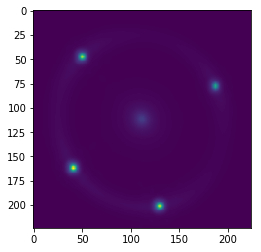

In [79]:
net.cuda()
net.eval()

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()# theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()# Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()


    print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
    output = net(data)
    print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
    print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
    print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
    plt.imshow(data.cpu().numpy()[0,0,:,:])
    plt.show()

    if batch_idx > 20:
        break

    
    
    
    

In [80]:
net.cuda()
net.eval()

theta_E_target_list = []
theta_E_output_list = []
e1_target_list = []
e1_output_list = []
e2_target_list = []
e2_output_list = []

source_x_target_list = []
source_x_output_list = []
source_y_target_list = []
source_y_output_list = []

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()#, theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()#Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()
    
    output = net(data)
    theta_E_target_list.append(theta_E.cpu().numpy()[0][0])
    e1_target_list.append(e1.cpu().numpy()[0][0])
    e2_target_list.append(e2.cpu().numpy()[0][0])
    source_x_target_list.append(source_x.cpu().numpy()[0][0])
    source_y_target_list.append(source_y.cpu().numpy()[0][0])
    
    
    theta_E_output_list.append(output[0][0].detach().cpu().numpy())
    e1_output_list.append(output[0][4].detach().cpu().numpy())
    e2_output_list.append(output[0][5].detach().cpu().numpy())
    source_x_output_list.append(output[0][6].detach().cpu().numpy())
    source_y_output_list.append(output[0][7].detach().cpu().numpy())
    
    
    if batch_idx > 1000:
        break
#     print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
#     output = net(data)
#     print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
#     print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
#     print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
#     plt.imshow(data.cpu().numpy()[0,0,:,:])
#     plt.show()

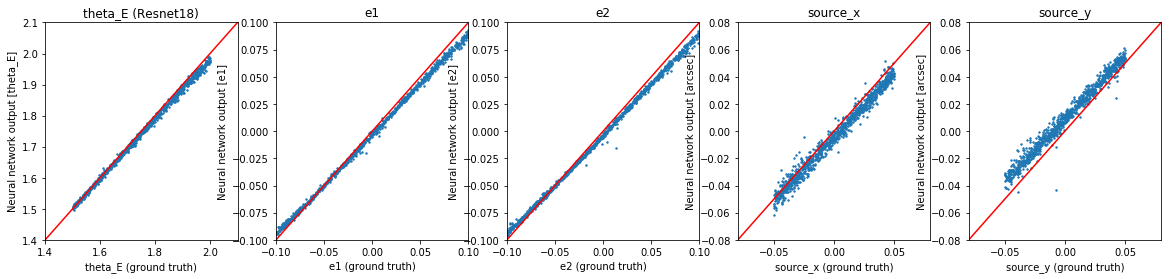

In [82]:
scale= np.linspace(1.4, 2.1 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(theta_E_target_list, theta_E_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("theta_E (Resnet18)")
plt.xlim(1.4, 2.1)
plt.ylim(1.4, 2.1)
plt.xlabel("theta_E (ground truth)")
plt.ylabel("Neural network output [theta_E]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.1, 0.1 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(e1_target_list, e1_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e1")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("e1 (ground truth)")
plt.ylabel("Neural network output [e1]")


scale= np.linspace(-0.1, 0.1 ,100)
plt.subplot(1, 5, 3)
plt.scatter(e2_target_list, e2_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e2")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("e2 (ground truth)")
plt.ylabel("Neural network output [e2]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + "scatter_plot.png")

plt.show()